In [68]:
import pandas as pd
import numpy as np
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
data = pd.read_csv('../task1_data.csv')
data = data.drop(['Sex'], axis=1)
print(data.columns)
print(data)

Index(['id', 'Birth_y', 'LifeTime', 'LastLog_days_ago', 'LastPayment_days_ago',
       'Sessions', 'Payments', 'Money', 'Level'],
      dtype='object')
        id  Birth_y    LifeTime  LastLog_days_ago  LastPayment_days_ago  \
0        1     1962  863.545576         18.548843            841.559299   
1        2     1972  498.545576          1.548843              3.559299   
2        3     1970  333.545576         17.548843            333.559299   
3        4     1962  148.545576         18.548843            144.559299   
4        5     1956  149.545576          1.548843            102.559299   
...    ...      ...         ...               ...                   ...   
6339  6340     1963   65.545576          1.548843             21.559299   
6340  6341     1986  259.545576         28.548843            177.559299   
6341  6342     1940  818.545576         12.548843            423.559299   
6342  6343     1955  855.545576          1.548843            706.559299   
6343  6344     1943  77

In [85]:
pd.concat([data.id, data.Birth_y, data.LifeTime, data.Payments]).value_counts()

contributing_factors = pd.concat([data.id, data.LifeTime, data.LastLog_days_ago, data.LastPayment_days_ago])
temp = pd.DataFrame({'contributing_factors':data.LifeTime.value_counts()})
df = temp.sort_values(by='contributing_factors', ascending=True)
plot_data = [
    go.Bar(
        y=df.index,
        x=df.contributing_factors,
        orientation='h'
    )
]
plot_layout = go.Layout(
    height=1000,
#     margin=go.Margin(l=300),
    title='Title'
)
fig=go.Figure(data=plot_data, layout=plot_layout)
py.plot(fig)

print(temp)


            contributing_factors
266.545576                    75
265.545576                    58
262.545576                    58
258.545576                    49
251.545576                    49
...                          ...
853.545576                     1
667.545576                     1
516.545576                     1
178.545576                     1
709.545576                     1

[765 rows x 1 columns]


In [84]:
sns.set(style="ticks")
iris = sns.load_dataset("iris")
print(iris)
tmp=sns.pairplot(data)
print(tmp)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [105]:
def corr(x, y, **kwargs):
    coef=np.corrcoef(x,y)[0][1]
    label = r'$\rho$ = ' + str(round(coef, 2))
    ax = plt.gca()
    ax.annotate(label, xy=(0.2,0.95), size=20, xycoords = ax.transAxes)

In [77]:
grid=sns.PairGrid(data=data)
grid=grid.map_upper(plt.scatter)
grid=grid.map_upper(corr)
grid=grid.map_lower(sns.kdeplot, cmap='Reds')
grid=grid.map_diag(plt.hist, bins=10, edgecolor= 'k')


In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)
st_data=scaler.transform(data)
print(stdata)

from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(st_data)
pca_data = pca.transform(st_data)
pca_data = pd.DataFrame(pca_data)

[[-1.73177781  0.14025118  3.21217989 ... -0.44044163 -0.21280942
  -0.3058369 ]
 [-1.73123176  0.90065924  1.21143606 ...  0.81442141 -0.16298021
  -0.22237038]
 [-1.73068572  0.74857763  0.30699022 ... -0.44044163 -0.2053825
  -0.55623645]
 ...
 [ 1.73068572 -1.53264657  2.96551284 ... -0.33586971 -0.18122176
  -0.51450319]
 [ 1.73123176 -0.39203447  3.16832797 ... -0.38815567 -0.18678729
  -0.37261011]
 [ 1.73177781 -1.30452415  2.74625324 ... -0.44044163 -0.21094803
  -0.43103667]]


/home/dmitriy/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/home/dmitriy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



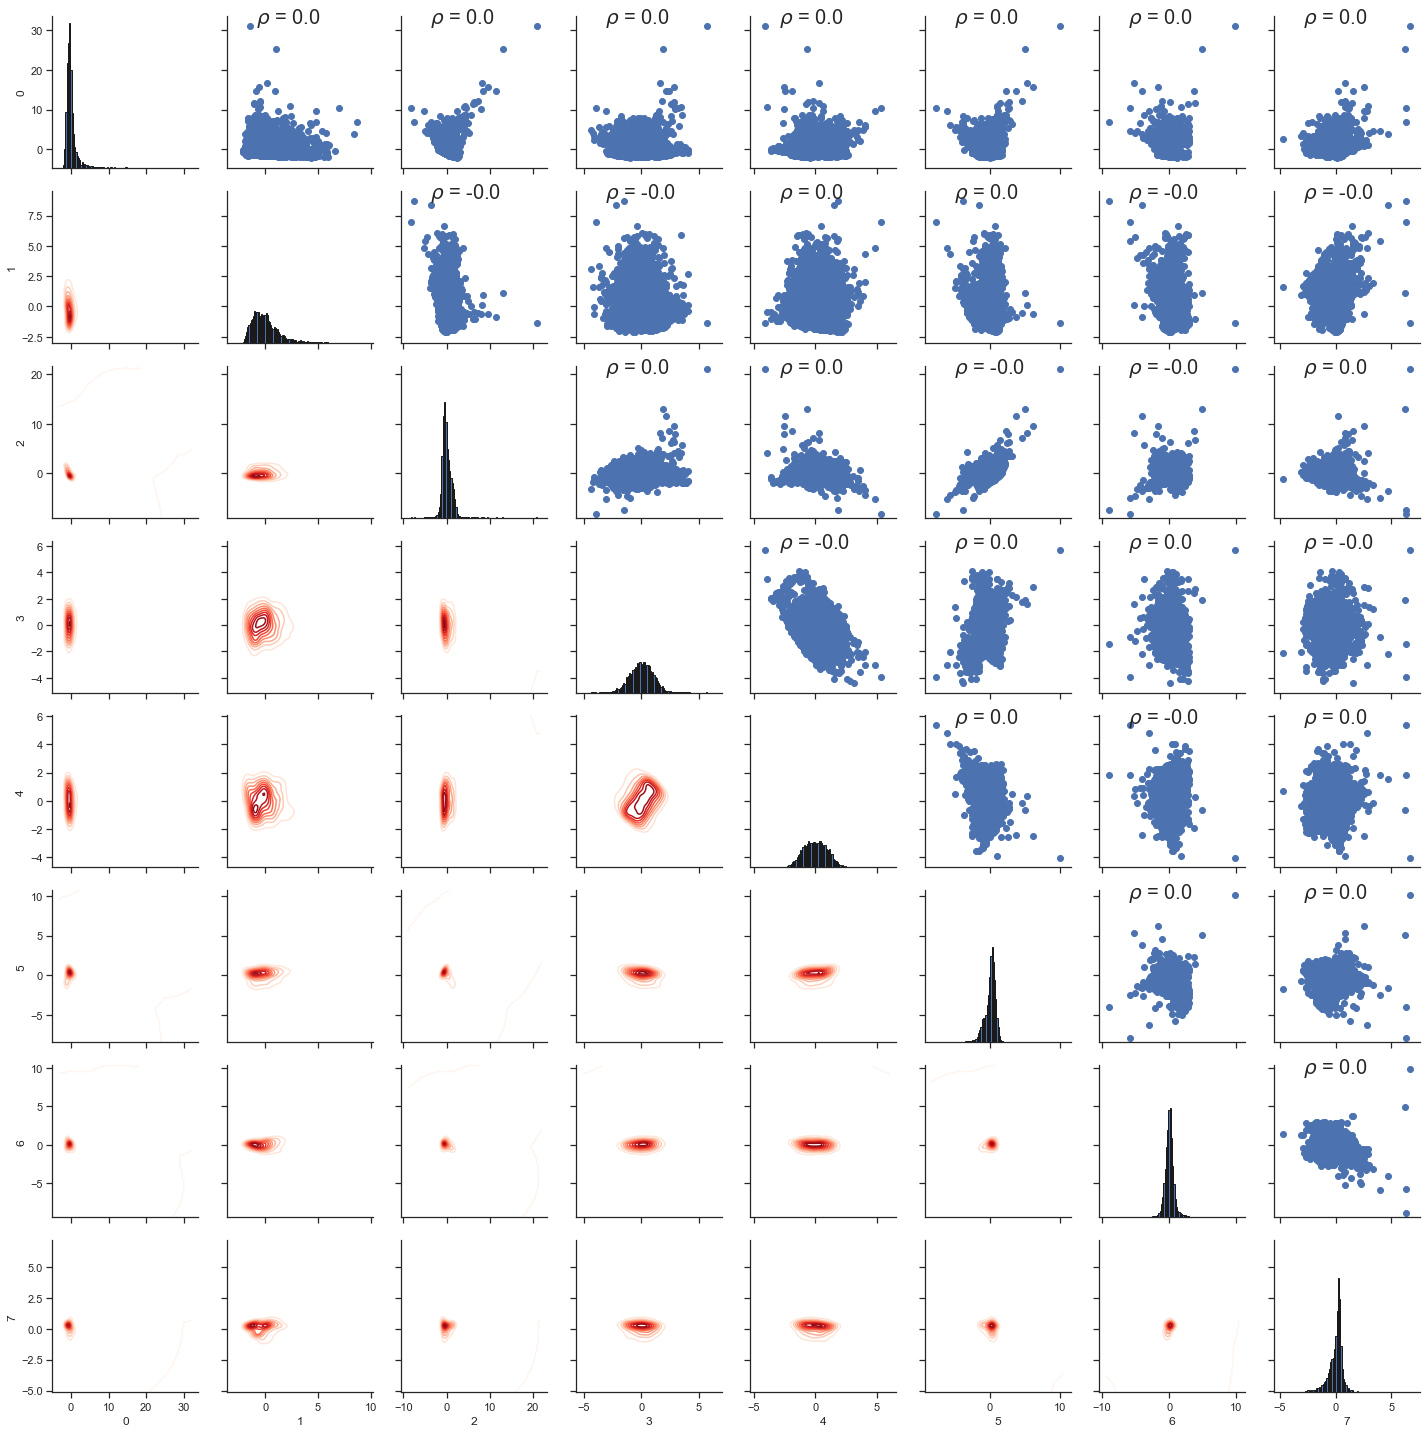

In [110]:
grid=sns.PairGrid(data=pca_data)
grid=grid.map_upper(plt.scatter)
grid=grid.map_upper(corr)
grid=grid.map_lower(sns.kdeplot, cmap='Reds')
grid=grid.map_diag(plt.hist, bins=100, edgecolor= 'k')
